In [ ]:
!curl -L -O https://github.com/Deval2211/My-Random-ML-Projects/tree/master/Dataset/diabetes-data.csv  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/diabetes-data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


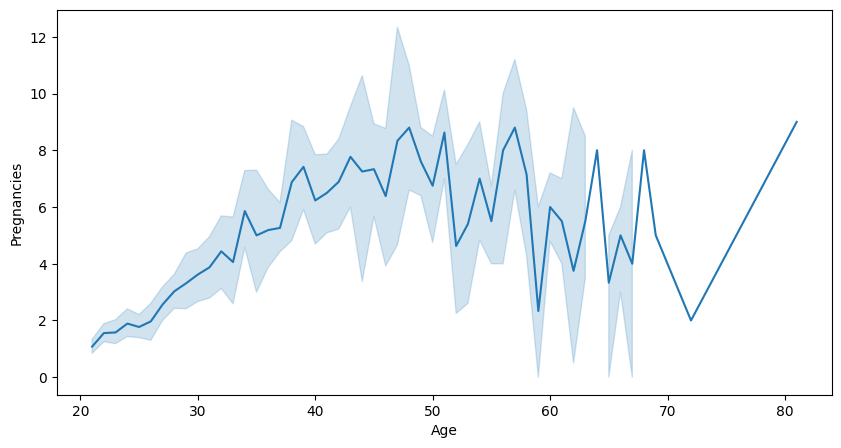

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='Pregnancies',data=df)
plt.show()

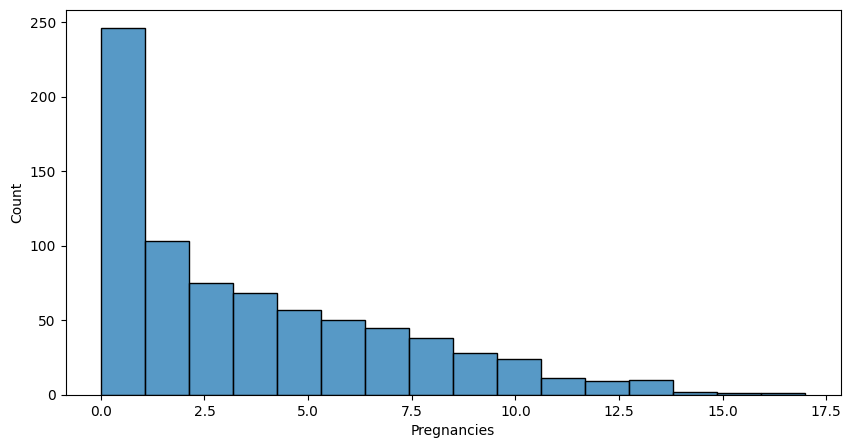

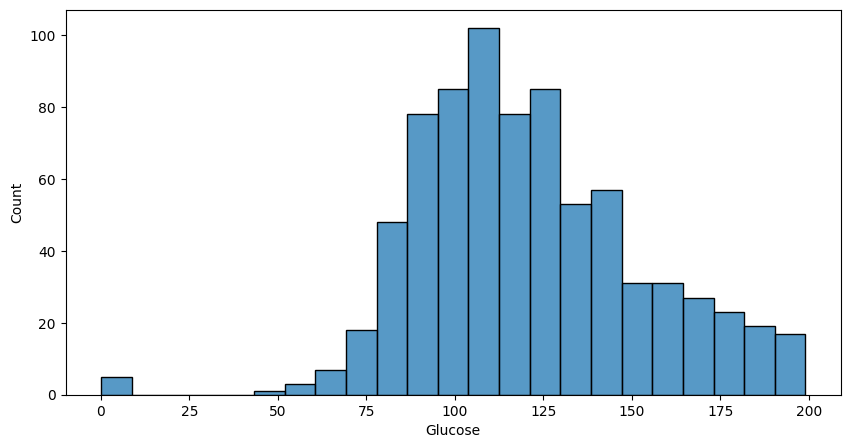

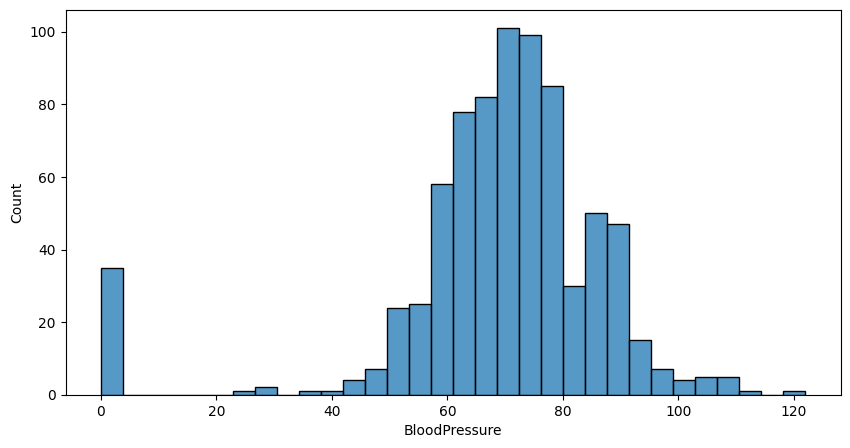

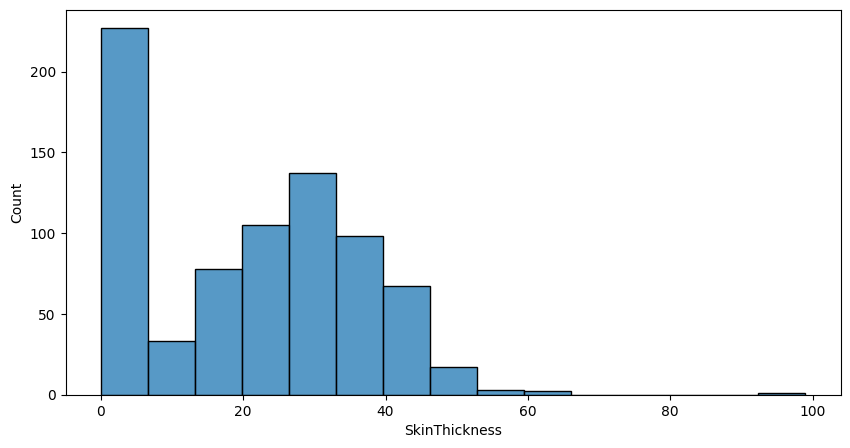

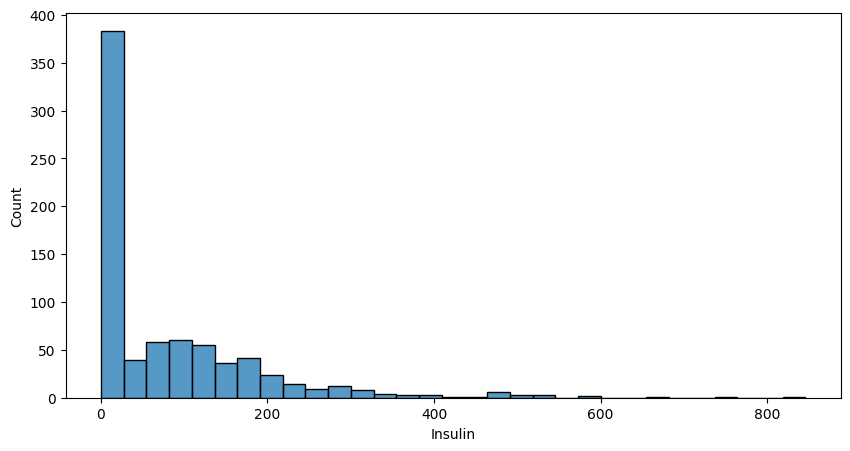

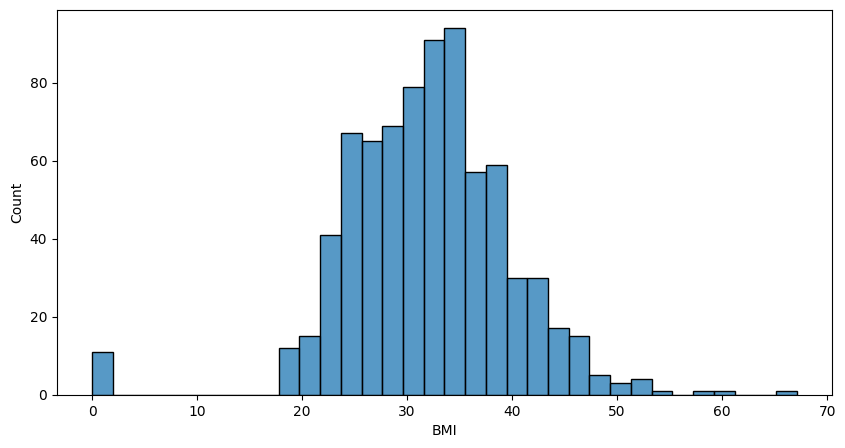

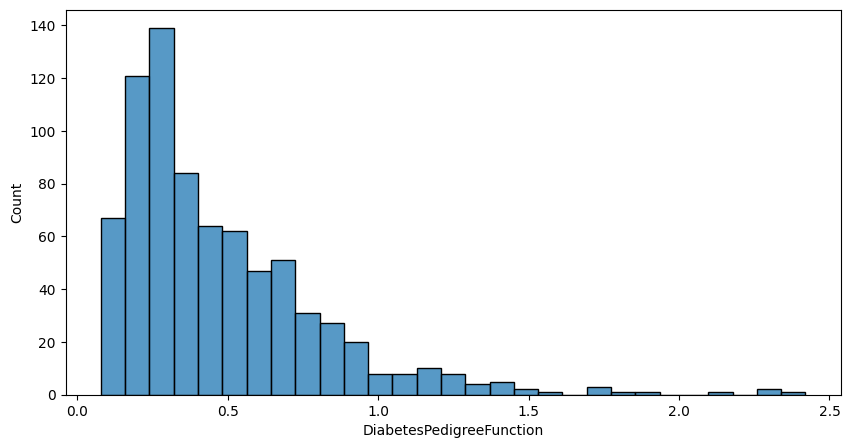

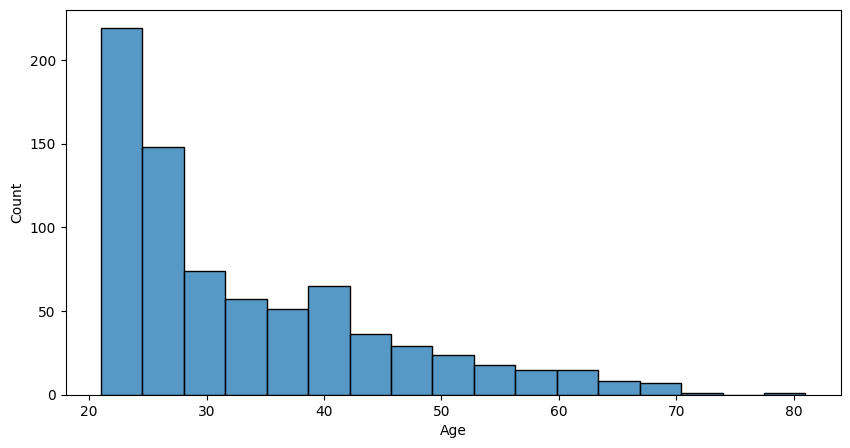

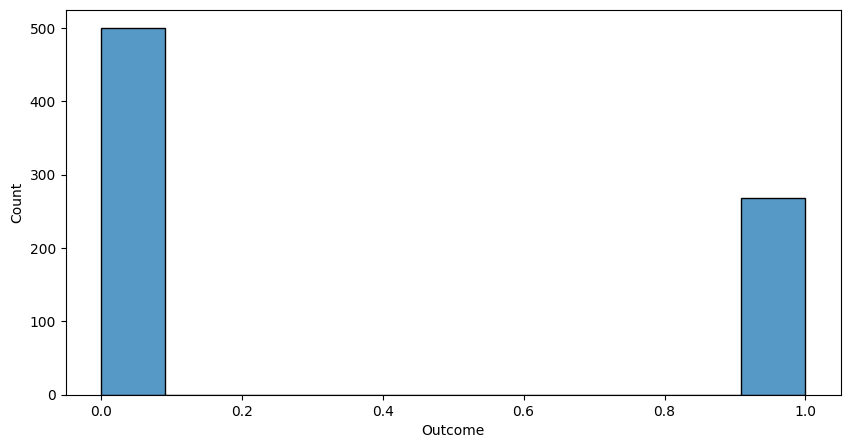

In [9]:
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i,data=df)
  plt.show()

In [10]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[column] = df[column].replace(0, np.median(df[column][df[column] != 0]))

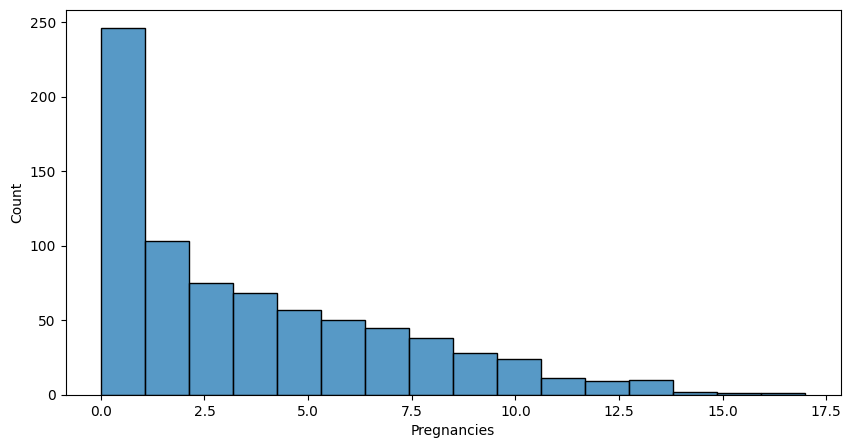

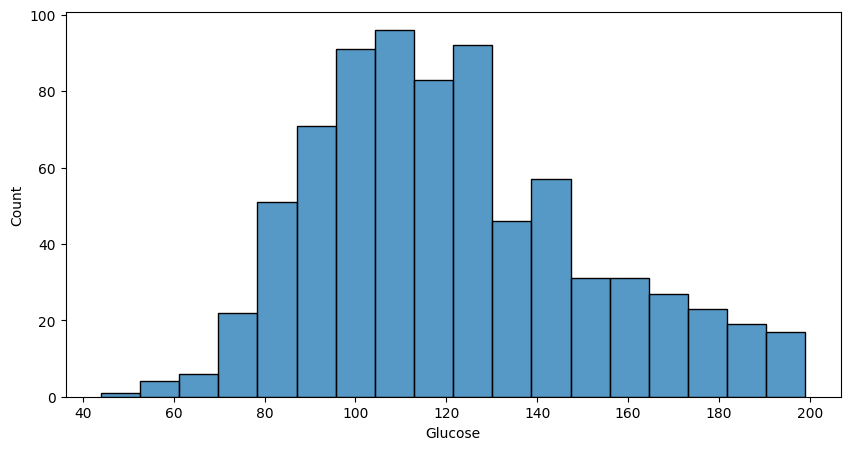

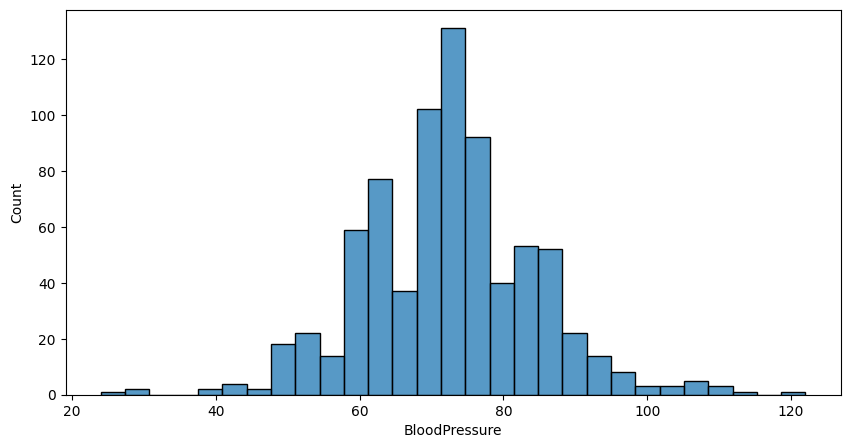

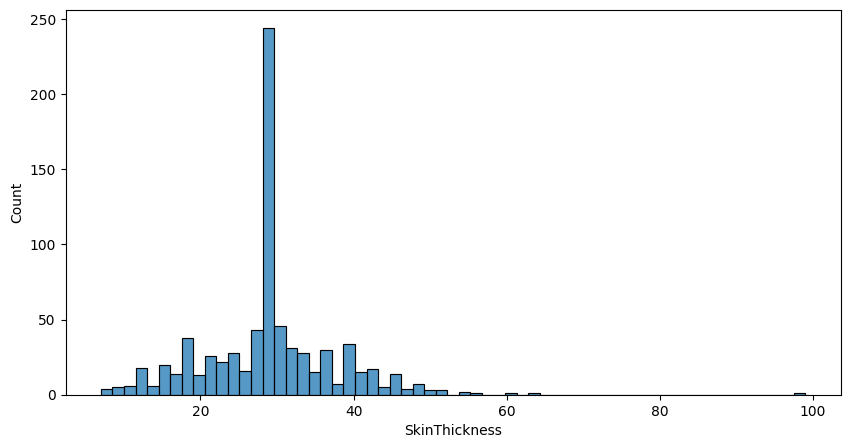

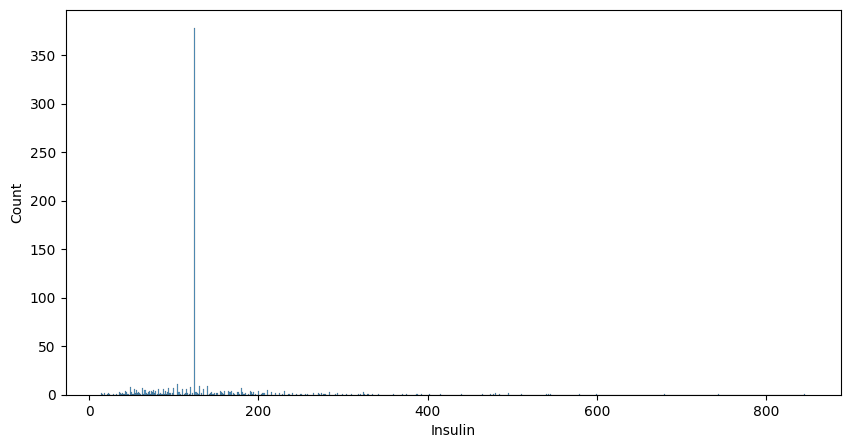

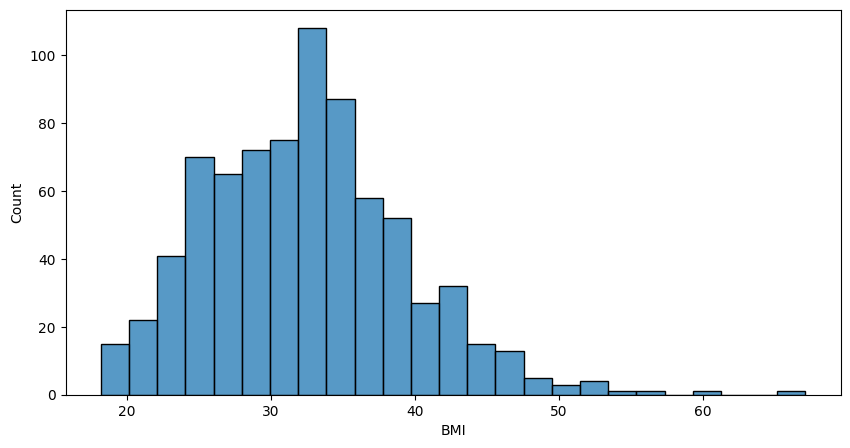

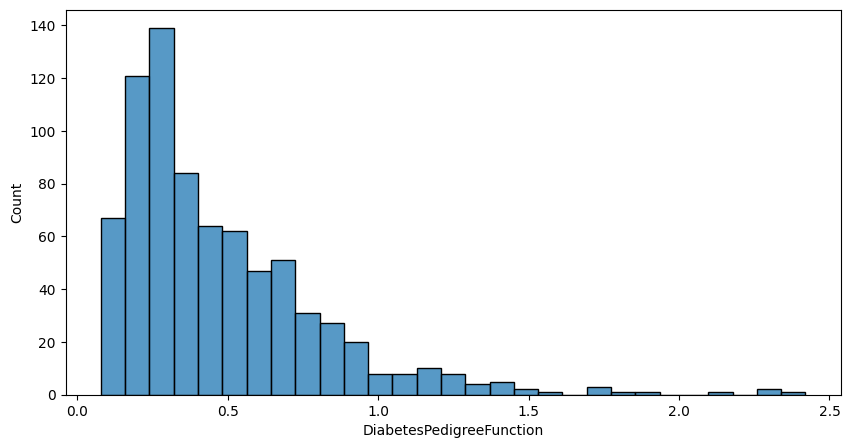

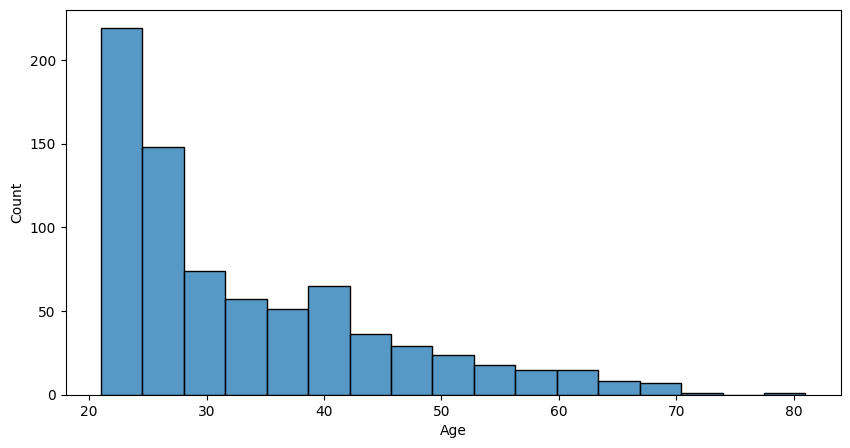

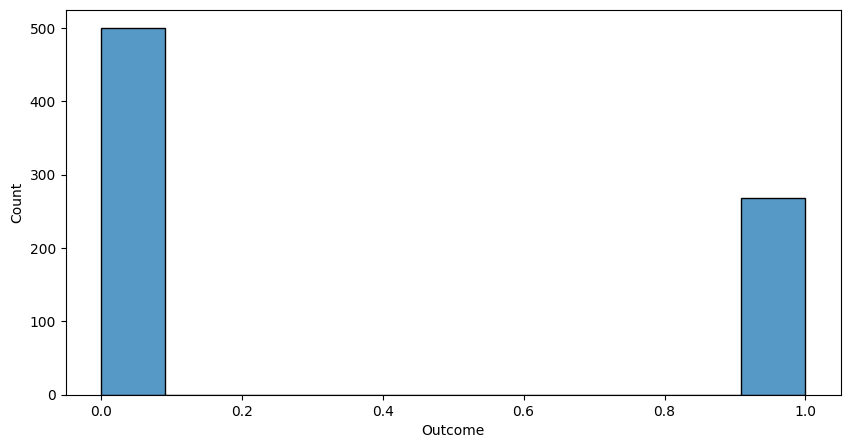

In [11]:
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i,data=df)
  plt.show()

In [12]:
df.shape

(768, 9)

In [13]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Figure size 1000x500 with 0 Axes>

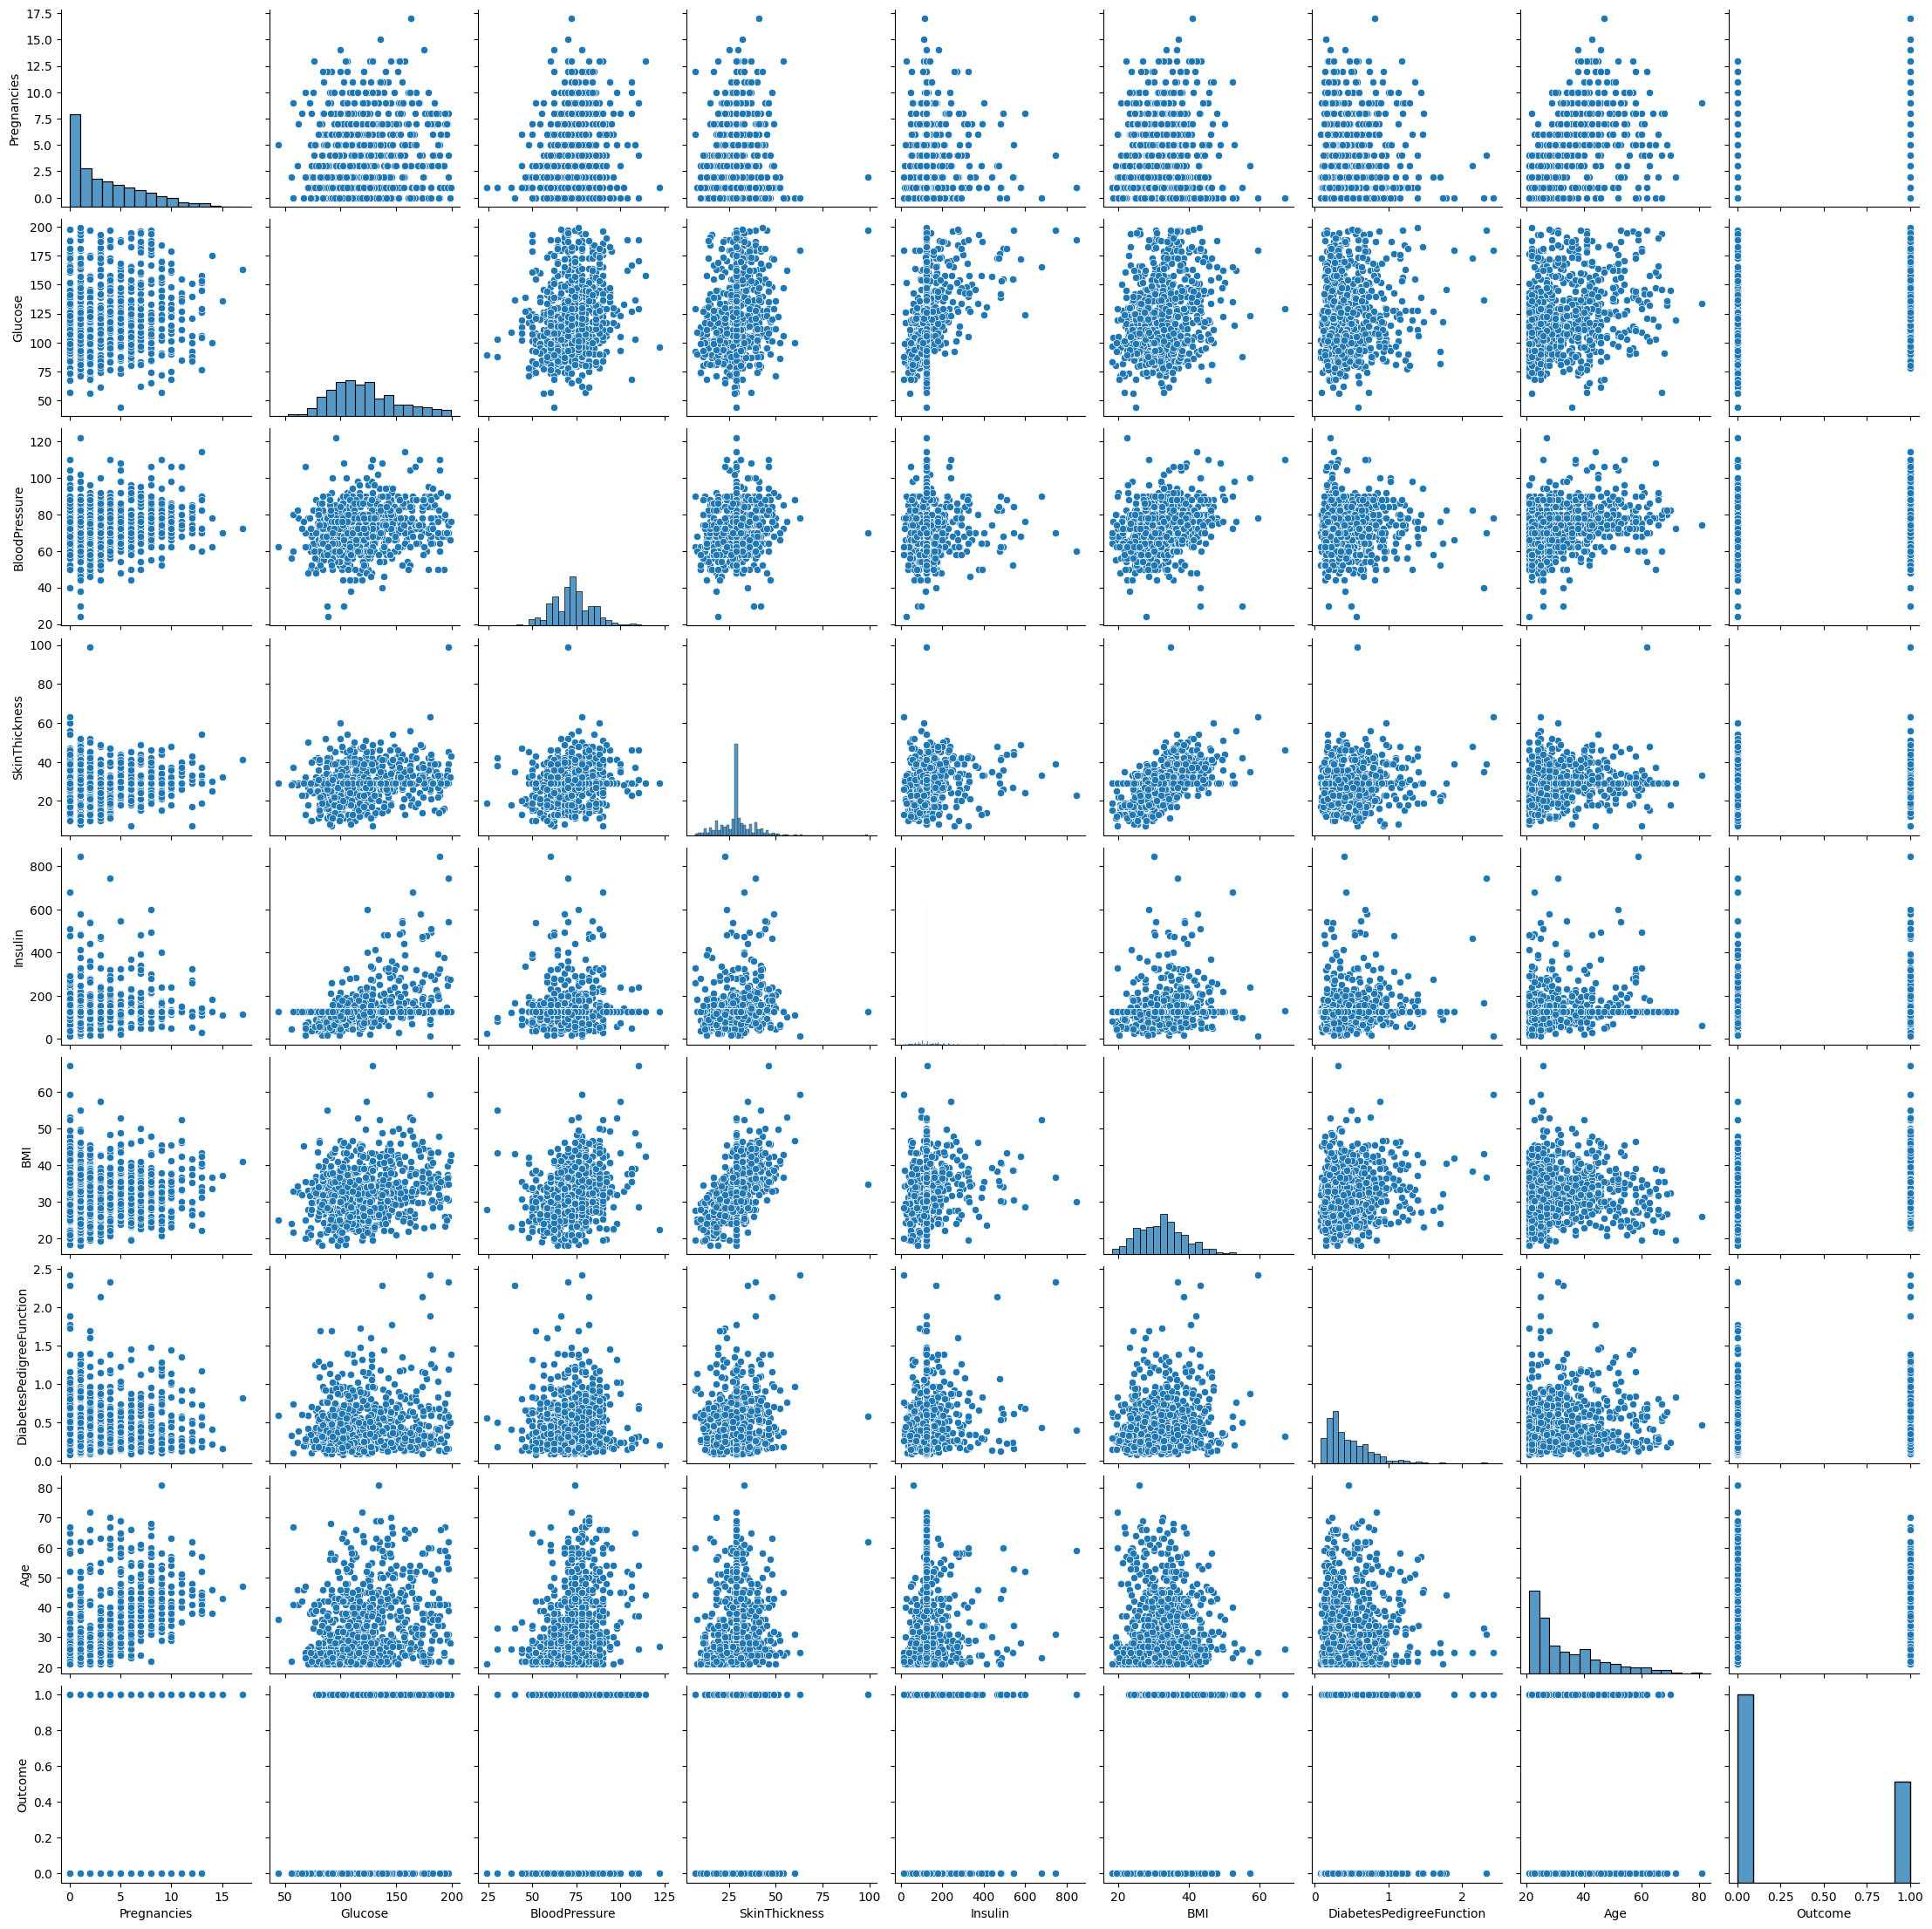

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

<Figure size 1000x500 with 0 Axes>

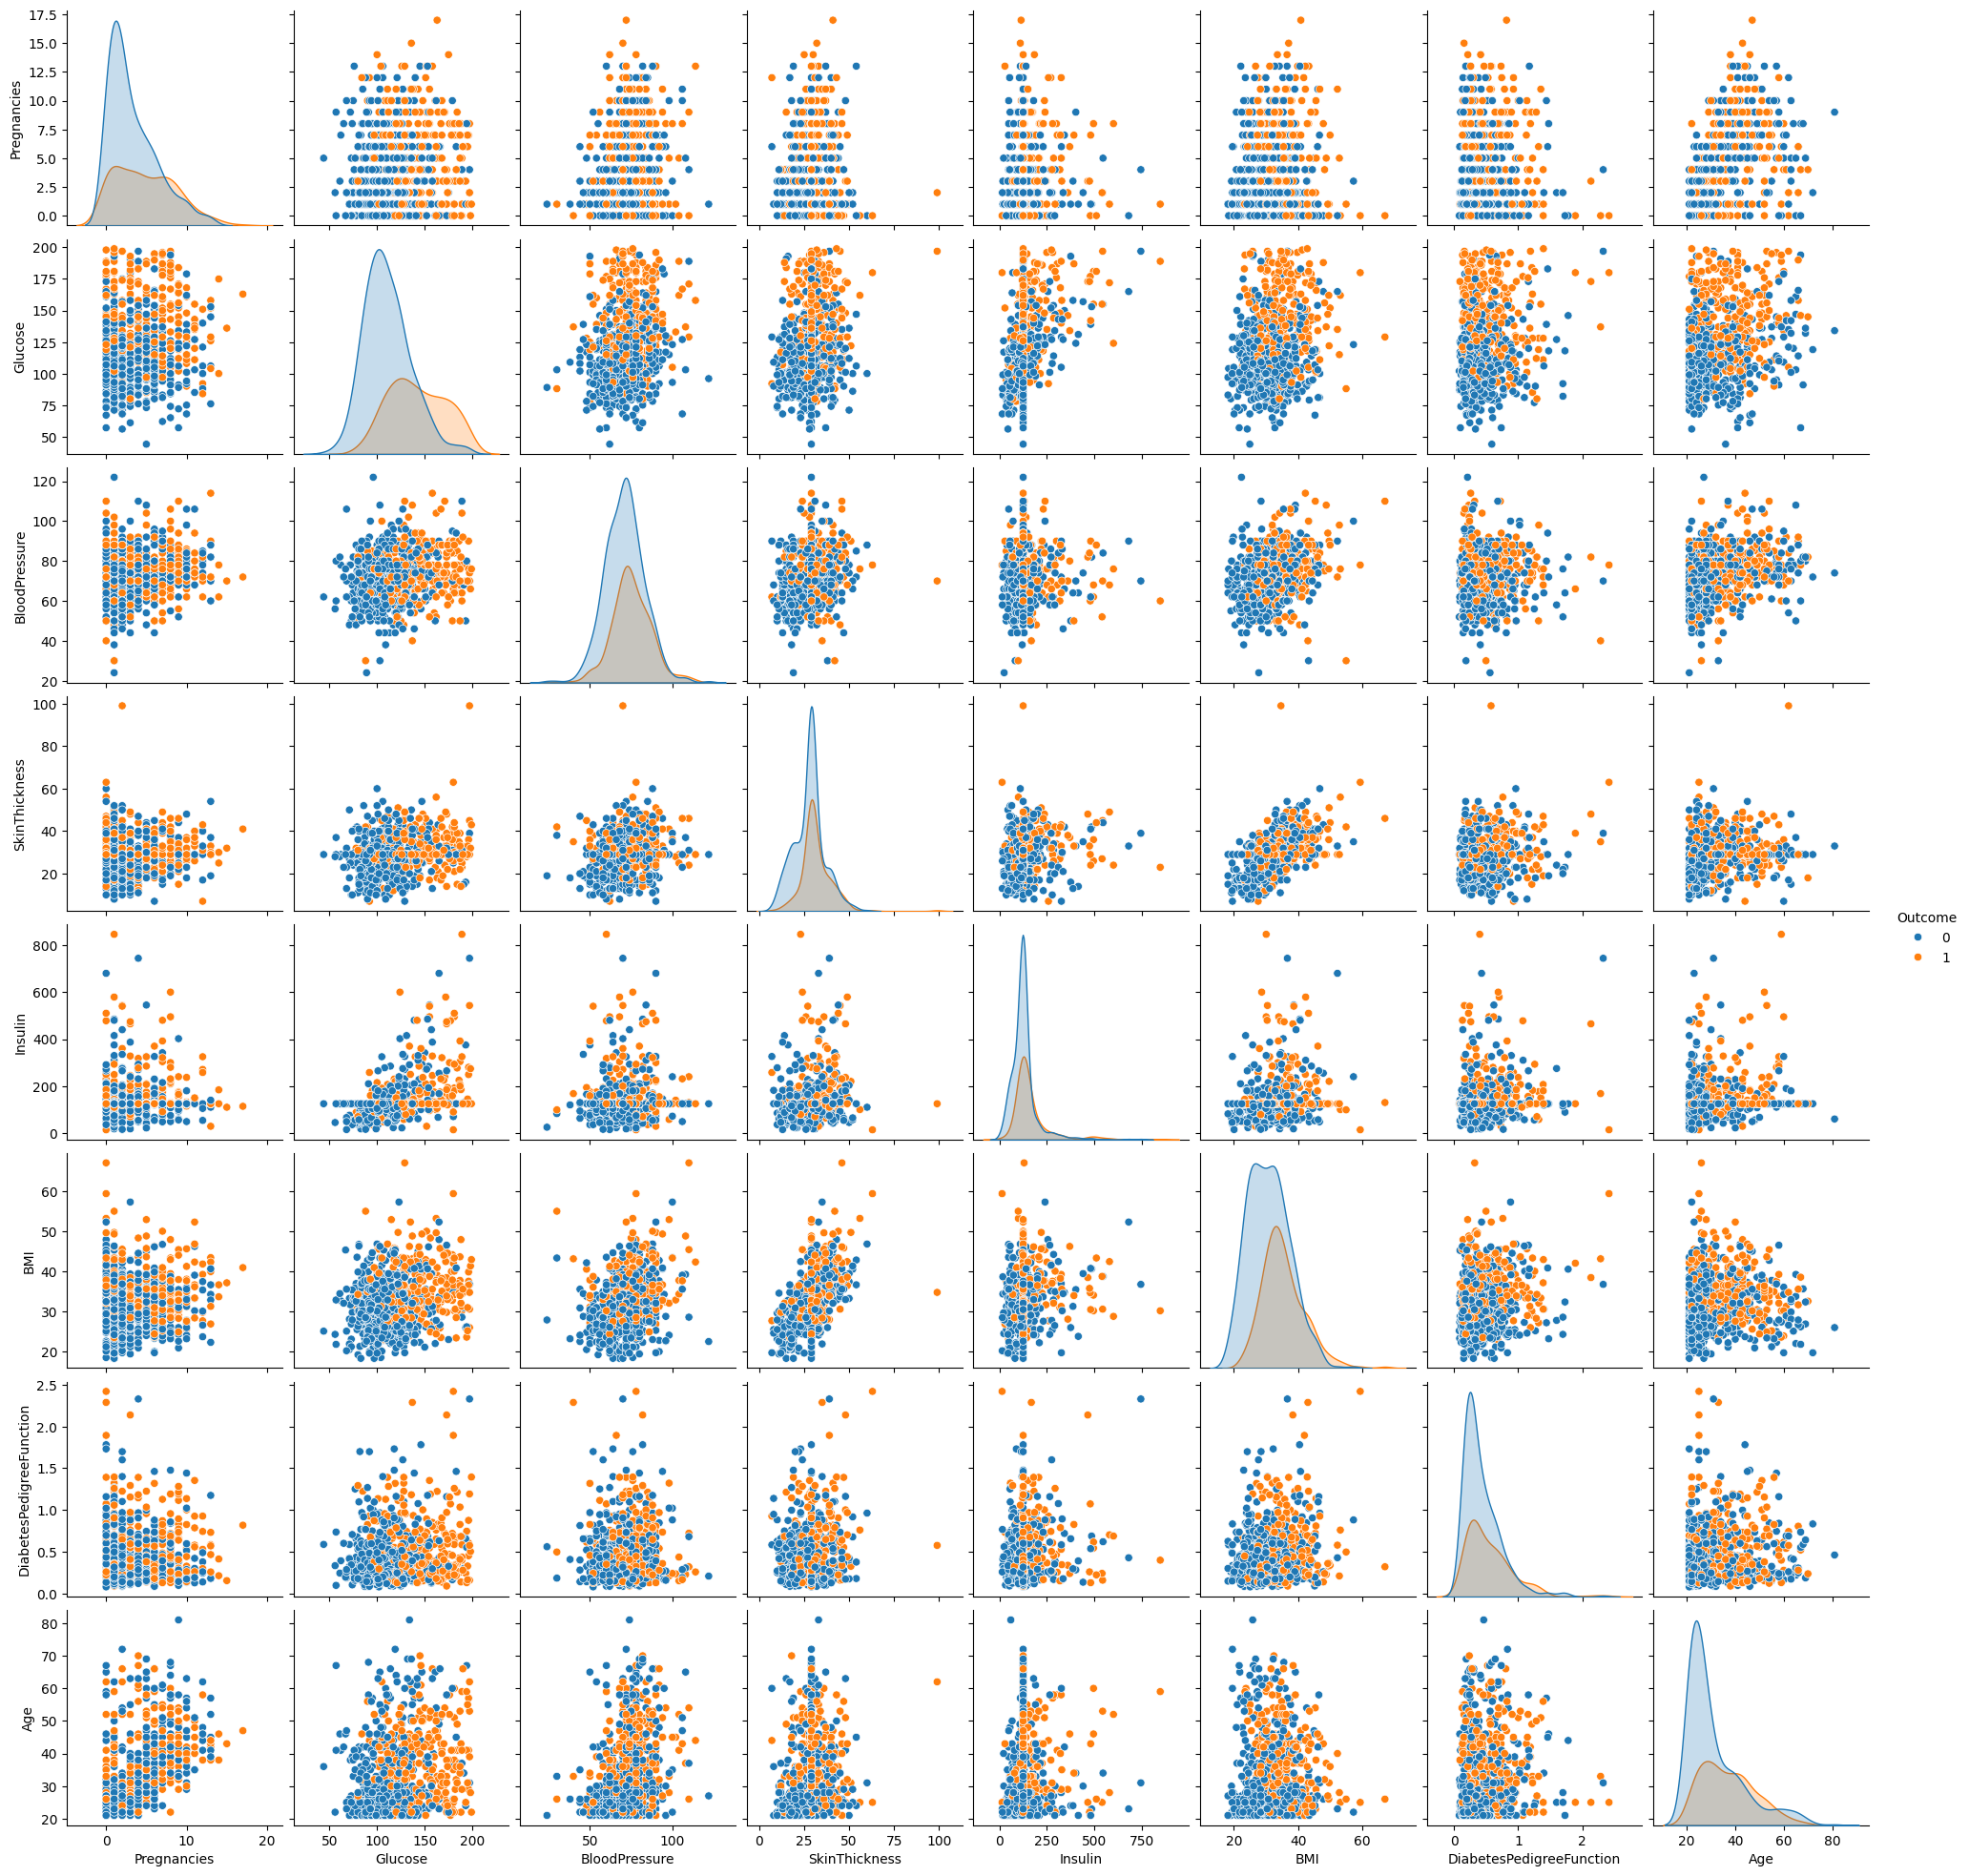

In [15]:
plt.figure(figsize=(10,5))
sns.pairplot(df,hue = "Outcome")
plt.show()

<Axes: >

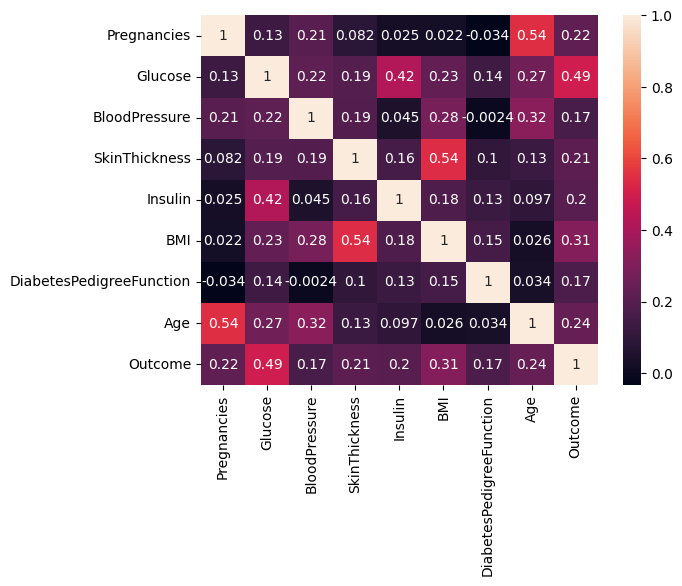

In [16]:
sns.heatmap(df.corr(),annot=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [29]:
X = df.drop("Outcome",axis=1)
y=df['Outcome']

In [30]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [32]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
accuracy_scores=[]
training_accuracy = []
testing_accuracy = []
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_resampled, y_resampled)
  y_pred = knn.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))
  training_accuracy.append(knn.score(X_resampled, y_resampled))
  testing_accuracy.append(knn.score(X_test, y_test))

print(f"Max Accuracy: {max(accuracy_scores)} for k = {accuracy_scores.index(max(accuracy_scores))}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Max Accuracy: 0.7795275590551181 for k = 7
Confusion Matrix:
 [[129  36]
 [ 21  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       165
           1       0.65      0.76      0.70        89

    accuracy                           0.78       254
   macro avg       0.76      0.77      0.76       254
weighted avg       0.79      0.78      0.78       254



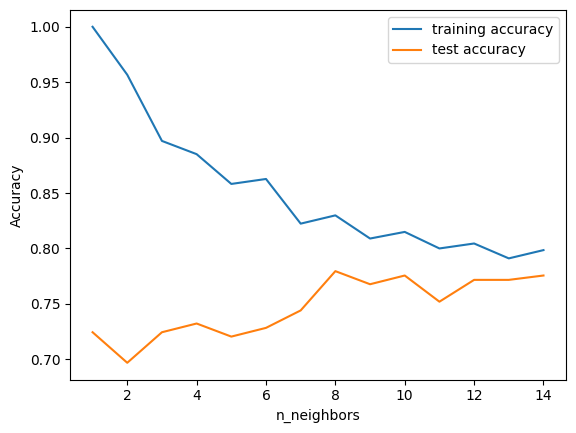

In [61]:
plt.plot(range(1,15), training_accuracy, label="training accuracy")
plt.plot(range(1,15), testing_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()